In [ ]:
import keras

**Simple Recurrent Neural Network(RNN) returning full state sequence**

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Embedding, SimpleRNN

In [ ]:
model = keras.models.Sequential()
model.add(Embedding(1000, 32))

#Simple RNN returning only the output at the last timestep --> model.add(SimpleRNN(32))
#do not use return_sequences option

model.add(SimpleRNN(32, return_sequences = True))
model.summary()

**Step 1: Stack several recurrent layers one after the other**

    - It increases the representation power of a network
    - All of the intermediate layers return full sequence of all outputs

In [ ]:
model = keras.models.Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))
model.summary()

**Step 2: Preparing the IMDB data**

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [ ]:
max_features = 10000
maxlen = 500
batch_size = 32

In [ ]:
print('Loading data...')

In [ ]:
imdb_path = "H:\\Professional Certification\\Deep Learning 2 -Udemy-October 2020\\imdb.npz"
(input_train, y_train), (input_test, y_test) = imdb.load_data(path = imdb_path, num_words = max_features)

In [ ]:
print(len(input_train), 'train_sequences')
print(len(input_test), 'test_sequences')

In [ ]:
print('Pad sequences (samples x time)')

In [ ]:
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)

In [ ]:
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

**Step 3: Train the model with Embedding and SimpleRNN layer**

In [ ]:
from keras.layers import Dense

In [ ]:
model = keras.models.Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [21]:
#history = model.fit(input_train, y_train, epochs = 10, batch_size=128, validation_split=0.2)

#epochs = 10 is very slow, so change it to 5
history = model.fit(input_train, y_train, epochs = 5, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 34s 2ms/step - loss: 0.1175 - acc: 0.9583 - val_loss: 0.5239 - val_acc: 0.7866
Epoch 2/5
20000/20000 [==============================] - 35s 2ms/step - loss: 0.0726 - acc: 0.9772 - val_loss: 0.4577 - val_acc: 0.8548
Epoch 3/5
20000/20000 [==============================] - 33s 2ms/step - loss: 0.0486 - acc: 0.9858 - val_loss: 0.5228 - val_acc: 0.8332
Epoch 4/5
20000/20000 [==============================] - 33s 2ms/step - loss: 0.0297 - acc: 0.9916 - val_loss: 0.6601 - val_acc: 0.8022
Epoch 5/5
20000/20000 [==============================] - 33s 2ms/step - loss: 0.0198 - acc: 0.9940 - val_loss: 0.7687 - val_acc: 0.7890


**Step 4: Plot the results**

In [22]:
import matplotlib.pyplot as plt 

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

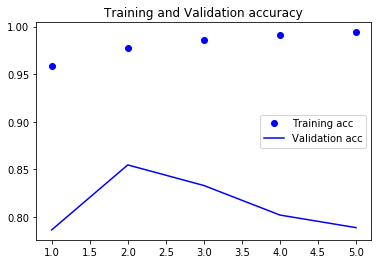

In [24]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

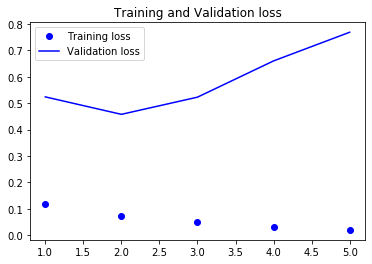

In [25]:
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [28]:
history = model.fit(input_train, y_train, epochs = 2, batch_size = 32, validation_data = (input_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 113s 5ms/step - loss: 0.1199 - acc: 0.9578 - val_loss: 0.5753 - val_acc: 0.7905
Epoch 2/2
25000/25000 [==============================] - 107s 4ms/step - loss: 0.0882 - acc: 0.9682 - val_loss: 0.5607 - val_acc: 0.8161
